In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from easing import easing
import pandas as pd
import matplotlib.pyplot as plt


# Prerequisites
In order to sucessfully run this notebook, you'll need to have the following installed

* FFMPEG (brew install ffmpeg on mac)
* Imagekick (brew install imagemagick)


# Tabel of contents
* [Simple 2D Point Animation](#2dscatter)
* [Swarm Animation](#2dscatterapplication)
* [Animated Barcharts](#animatedbarcharts)
* [Ergodic Plots](#ergodic)


# Loading the data
prior to creating animation, you need to create a class by loading the data itself. Differenet animation methods can then be called on this data

example: 

data=np.random.random((10,2))

animation_class=easing.Eased(data)

or

animation_class2=easing.Eased(pd.Dataframe(data))

## Moving a single point in 2d <a class="anchor" id="2dscatter"></a>

Simply pass MxN numpy array where M is the number of distinct time points, and N is the dimensions for each point. All even numbered columns are X values and odd numbered columns are Y values

To turn a two column (x,y) data source into this format simply use .reshape(1,-1) followed by np.vstack for each row. (see example below)

This function takes the following arguments:

* **n**: the power of the interpolation (the higher the value, the jerkier the animation) - must be positive valued integer.
* **smoothness**: the number of frames actually made in the animation, large smoothness values will result in large files that take a while but look nice. Default is 30.
* **speed** : multiplier of the speed of the animation. Must be a positive valued number : <1 is slower; >1 is faster.
* **destination** : if a destination is given it will save the animation. Extension will indicate the filetype (.gif or .mp4)
* **gif** if set to true, this will display an inline gif for an ipython environmnet. You can save as a gif simply buy adding .gif to the end of of the destination argument as well.
* **plot_kws** : These are matplotlib key word arguments that will be passed to the axis of the animation
* **label**: if True, the indexes of the pandas dataframe will be used to label the discrete time points of the animation



No time vector included - defaulting to number of rows


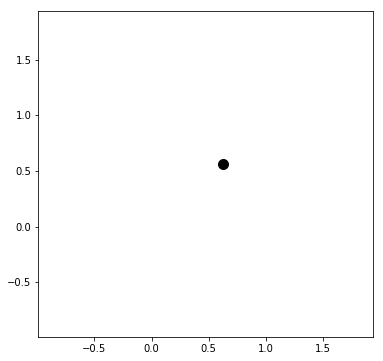

In [2]:

# simple example : one point moving over time
data=np.random.random((10,2))
easing.Eased(data).scatter_animation2d(n=3,speed=0.5,destination='media/singlepoint.gif')

## Moving multiple points in 2d with labels <a class="anchor" id="2dscatterapplication"></a>

The Example above extends to N points. Simply stack arrays in the following format

|X1<sub>t0</sub> Y1<sub>t0</sub> X2<sub>t0</sub> Y2<sub>t0</sub> ... Xn<sub>t0</sub> Yn<sub>t0</sub>|

|X1<sub>t1</sub> Y1<sub>t1</sub> X2<sub>t1</sub> Y2<sub>t1</sub> ... Xn<sub>t1</sub> Yn<sub>t1</sub>|

|X1<sub>t2</sub> Y1<sub>t2</sub> X2<sub>t2</sub> Y2<sub>t2</sub> ... Xn<sub>t2</sub> Yn<sub>t2</sub>|

where each row is a time point


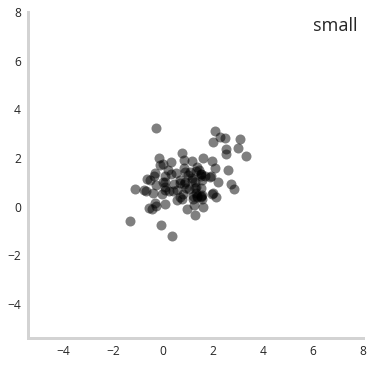

In [4]:
# advanced scatterplot animation : multiple points moving with labels saved as a gif

size=100
u=np.random.multivariate_normal([1,1],[[1, 0.5], [0.5, 1]],size=size).reshape(1,-1)
v=np.random.multivariate_normal([1,1],[[2, 1], [1, 2]],size=size).reshape(1,-1)
w=np.random.multivariate_normal([1,1],[[4, 2], [2, 4]],size=size).reshape(1,-1)

data=pd.DataFrame(np.vstack([u,v,w]),index=['small','medium','large'])
easing.Eased(data).scatter_animation2d(speed=0.5,label=True,plot_kws={'alpha':0.5},destination='media/multipoint.gif')

# Animated Barcharts

This method alows you to create moving barcharts that animate through time. Here the rows are the time points (as above) but the columns here represent the actual values.

You can pass either a dataframe or a numpy array.

This method takes the following arguments:

* **n**: the power of the interpolation (the higher the value, the jerkier the animation) - must be positive valued integer.
* **smoothness**: the number of frames actually made in the animation, large smoothness values will result in large files that take a while but look nice. Default is 30.
* **speed** : multiplier of the speed of the animation. Must be a positive valued number : <1 is slower; >1 is faster.
* **destination** : if a destination is given it will save the animation. Extension will indicate the filetype (.gif or .mp4)
* **gif** if set to true, this will display an inline gif for an ipython environmnet. You can save as a gif simply buy adding .gif to the end of of the destination argument as well.
* **plot_kws** : These are matplotlib key word arguments that will be passed to the axis of the animation
* **label**: if True, the indexes of the pandas dataframe will be used to label the discrete time points of the animation

For these plots, the index labels of a dataframe indicate the time points it will iterate over, while the column lables indicate the bar labels. 


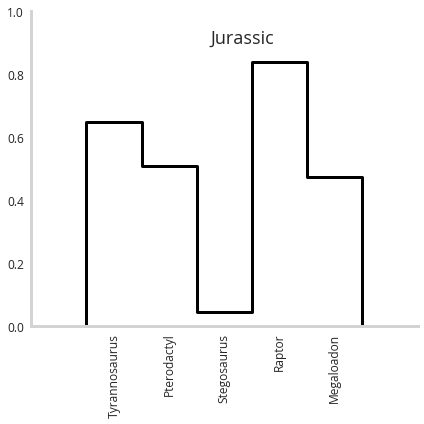

In [10]:
data=pd.DataFrame(abs(np.random.random((3, 5))),
                  index=['Jurassic', 'Cretaceous', 'Precambrian'],
                  columns=['Tyrannosaurus','Pterodactyl','Stegosaurus','Raptor','Megaloadon'])

easing.Eased(data).barchart_animation(plot_kws={'ylim':[0,1],'xlim':[-2,5]},smoothness=40,speed=0.5,label=True,destination='media/animatedbar.gif')



# Ergodic plots<a class="anchor" id="ergodic"></a>

These plots are meant to show the relationships between time series stochastic processes and the satistical distributions they produce. On the left hand side, we have the time series trace, and on the right we have the distribution as it fills in.

These functions can be called with our without interpolation.

So far this function can only take a 1xN array, passing arrays with more than one dimension will result in an error.

This method takes the following arguments:

* **n**: the power of the interpolation (the higher the value, the jerkier the animation) - must be positive valued integer.
* **starting_pos**: How many values to keep in frame on the time series plot
* **smoothness**: the number of frames actually made in the animation, large smoothness values will result in large files that take a while but look nice. Default is 30.
* **speed** : multiplier of the speed of the animation. Must be a positive valued number : <1 is slower; >1 is faster.
* **interp_freq**: This is the number of points to be placed between each given data point. default is 0, every integer greater than that adds a single point.
* **destination** : if a destination is given it will save the animation. Extension will indicate the filetype (.gif or .mp4)
* **gif** if set to true, this will display an inline gif for an ipython environmnet. You can save as a gif simply buy adding .gif to the end of of the destination argument as well.
* **plot_kws** : These are matplotlib key word arguments that will be passed to the axis of the animation (this includes the bins argument for the 
* **final_dist**: if True, this will show the final distribution of all points on the right hand side as it fills up


No time vector included - defaulting to number of rows


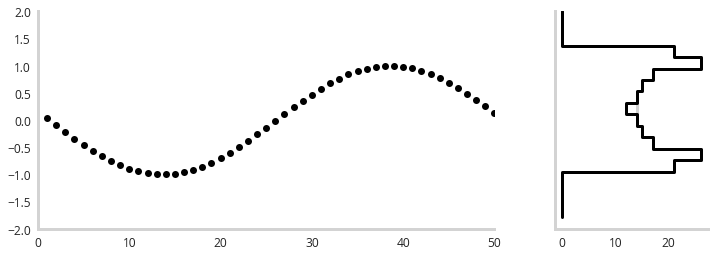

In [84]:
# simple sin wave plot: a simple sine wave without interpolation 
data = np.sin(np.linspace(0,np.pi*8,200))

easing.Eased(data).timeseries_animation(starting_pos = 50,speed=25,final_dist=True,destination='media/sinewav.gif')


No time vector included - defaulting to number of rows


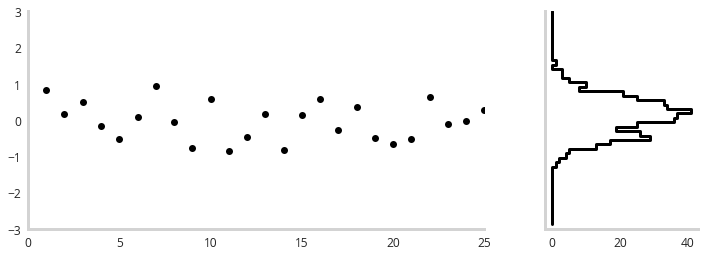

In [87]:
# normal distribution plot without interpolation with custom bins
# note: this one takes a little bit of time
data = np.random.normal(scale=0.5,size=400)
easing.Eased(data).timeseries_animation(starting_pos = 25,
                                        speed=25,
                                        plot_kws={'ylim':[-3,3],'bins':np.linspace(-3,3,50)},destination='media/normdist.gif')

No time vector included - defaulting to number of rows


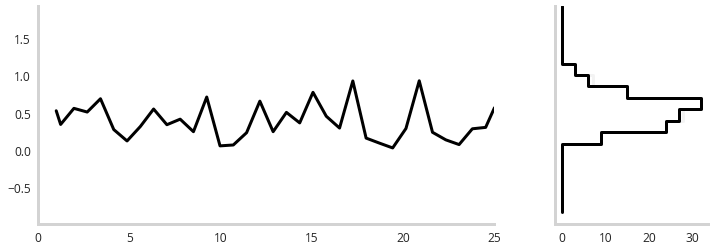

In [54]:
# adding linear interpolation to plot

data=np.random.rand(40,1)

easing.Eased(data).timeseries_animation(starting_pos = 25,interp_freq=3,n=1,speed=10,norm_hist=False,plot_kws={'linestyle':'-','marker':None})

In [78]:
# Conclusion 